# Import Packages for analysis

In [1]:
from aind_dynamic_foraging_data_utils import nwb_utils
import aind_dynamic_foraging_basic_analysis.licks.annotation as annotation
import glob

# Load NWBs


determine path to data asset and then load nwb files

In [2]:
nwb_files = glob.glob('../data/**/nwb/**.nwb')
nwb = nwb_utils.load_nwb_from_filename(nwb_files[0])

## Extract dataframes

### Trials dataframe
df_trials is a dataframe where each row is a trial. We can add this dataframe to the nwb object as an attribute just to keep the dataframes organized.


timestamps that are marked `absolute` are absolute with respect to the go cue on the first trial. Other timestamps are relative to the go cue for that trial (row)


In [3]:
nwb.df_trials = nwb_utils.create_df_trials(nwb)
nwb.df_trials

/src/aind-dynamic-foraging-data-utils/src/aind_dynamic_foraging_data_utils/nwb_utils.py:380: RuntimeWarning: All-NaN slice encountered
  lambda x: np.nanmin(
/src/aind-dynamic-foraging-data-utils/src/aind_dynamic_foraging_data_utils/nwb_utils.py:397: RuntimeWarning: All-NaN slice encountered
  lambda x: np.nanmin(np.concatenate([[np.nan], x["right_lick_time"], x["left_lick_time"]])),


,trial,start_time,stop_time,animal_response,rewarded_historyL,rewarded_historyR,delay_start_time,goCue_start_time,reward_outcome_time,bait_left,...,start_time_absolute,stop_time_absolute,delay_start_time_absolute,goCue_start_time_absolute,reward_outcome_time_absolute,reward_time,reward_time_absolute,choice_time,choice_time_absolute,reward
0,0,-3.132128,3.669856,2.0,False,False,-1.328128,0.0,0.656352,False,...,0.000000,6.808000,1.804000,3.132128,3.788480,NaN,NaN,NaN,NaN,0
1,1,-5.243744,4.015232,2.0,False,False,-0.984768,0.0,0.996736,False,...,6.808000,16.072992,11.066976,12.051744,13.048480,NaN,NaN,NaN,NaN,0
2,2,-8.895648,4.015360,2.0,False,False,-0.984640,0.0,0.996832,False,...,16.072992,28.989984,23.984000,24.968640,25.965472,NaN,NaN,NaN,NaN,0
3,3,-2.628928,4.015072,2.0,False,False,-0.984928,0.0,0.996576,True,...,28.989984,35.638976,30.633984,31.618912,32.615488,NaN,NaN,NaN,NaN,0
4,4,-3.996224,4.015776,2.0,False,False,-0.984224,0.0,0.997280,True,...,35.638976,43.656992,38.650976,39.635200,40.632480,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,538,-6.511904,3.165088,1.0,False,False,-0.984928,0.0,0.156576,True,...,5368.100000,5377.782976,5373.626976,5374.611904,5374.768480,NaN,NaN,0.1572,5374.769104,0
539,539,-10.561824,3.299200,0.0,True,False,-0.983808,0.0,0.284672,True,...,5377.782976,5391.649984,5387.360992,5388.344800,5388.629472,0.2862,5388.631000,0.2849,5388.629700,1
540,540,-2.278752,3.282240,0.0,True,False,-0.984736,0.0,0.272736,True,...,5391.649984,5397.216992,5392.944000,5393.928736,5394.201472,0.2753,5394.204036,0.2733,5394.202036,1
541,541,-15.061920,3.332064,1.0,False,False,-0.984928,0.0,0.312576,False,...,5397.216992,5415.616992,5411.293984,5412.278912,5412.591488,NaN,NaN,0.3136,5412.592512,0


### Events dataframe
`df_events` is a tidy dataframe that contains the timestamps of events in the session.

The `trial` column shows what trial the event happened during, -1 means before the first trial. Any events that happen after the last go cue are considered part of the last trial. 

`timestamps` are relative to the go cue on the first trial

The `right_reward_delivery_time` and `left_reward_delivery_time` contain annotations in the `data` column whether the reward was `earned` (delivered during the normal course of the session), `manual` (manually delivered by the experimenter), or `auto` (automatically given to boost mouse motivation)

In [4]:
nwb.df_events = nwb_utils.create_events_df(nwb)
print('These are the event types in this session:')
print(nwb.df_events['event'].unique())
nwb.df_events

These are the event types in this session:
['right_lick_time' 'left_lick_time' 'goCue_start_time'
 'right_reward_delivery_time' 'left_reward_delivery_time']


,timestamps,data,event,trial
0,-511.123264,1.0,right_lick_time,-1
1,-510.826560,1.0,left_lick_time,-1
2,-510.609696,1.0,left_lick_time,-1
3,-510.435328,1.0,left_lick_time,-1
4,-510.209120,1.0,left_lick_time,-1
...,...,...,...,...
4837,5449.042368,1.0,right_lick_time,543
4838,5449.117152,1.0,left_lick_time,543
4839,5449.438464,1.0,right_lick_time,543
4840,5449.452352,1.0,right_lick_time,543


### Fiber photometry dataframe

The fiber photometry dataframe ("fip") contains the timeseries of fiber photometry measurements of neurmodulators. This experiment has two fibers ("1" and "2"), and each fiber has measurements in three channels (Green, Red, and Iso). Each channel/fiber combination is preprocessed with three preprocessing methods ("poly", "exp", and "bright").

The fiber photometry measurements include 10 minutes of baseline activity before the start of the first trial.

In [5]:
nwb.fip_df = nwb_utils.create_fib_df(nwb, tidy=True)
print(nwb.fip_df['event'].unique())
nwb.fip_df.head(20)

['G_1_dff-poly' 'G_2_dff-bright' 'G_1_dff-exp' 'G_1' 'G_2_dff-exp' 'G_2'
 'FIP_rising_time' 'G_2_dff-poly' 'G_1_dff-bright' 'Iso_1_dff-exp' 'Iso_2'
 'Iso_1_dff-poly' 'Iso_1_dff-bright' 'Iso_2_dff-exp' 'Iso_2_dff-poly'
 'Iso_1' 'Iso_2_dff-bright' 'FIP_falling_time' 'R_1_dff-poly'
 'R_1_dff-exp' 'R_1_dff-bright' 'R_1' 'R_2_dff-poly' 'R_2_dff-exp'
 'R_2_dff-bright' 'R_2']


,timestamps,data,event
0,-599.536768,0.063319,G_1_dff-poly
1,-599.536768,0.037850,G_2_dff-bright
2,-599.536768,0.063629,G_1_dff-exp
3,-599.536768,258.072539,G_1
4,-599.536768,0.041524,G_2_dff-exp
5,-599.536768,258.116306,G_2
6,-599.536768,1.000000,FIP_rising_time
7,-599.536768,0.051534,G_2_dff-poly
8,-599.536768,0.099064,G_1_dff-bright
9,-599.522432,-0.000444,Iso_1_dff-exp


In [6]:
# Filter for one channel/fiber/processing method
nwb.fip_df.query('event=="G_1_dff-poly"').head(20)


,timestamps,data,event
0,-599.536768,0.063319,G_1_dff-poly
32,-599.486784,0.063319,G_1_dff-poly
60,-599.436768,0.063319,G_1_dff-poly
83,-599.386784,0.063319,G_1_dff-poly
106,-599.336800,0.063319,G_1_dff-poly
137,-599.286784,0.063319,G_1_dff-poly
164,-599.236800,0.063319,G_1_dff-poly
188,-599.186784,0.063319,G_1_dff-poly
214,-599.136800,0.063319,G_1_dff-poly
241,-599.086784,0.063319,G_1_dff-poly


### Licks dataframe

This dataframe contains annotations of the licking patterns during the session. It segments licks into licking bouts using an interlick interval (ili) threshold of 700ms. 

timestamps (float) time relative to first go cue

event (string) whether this was a left or right lick

trial (int) what trial did this lick happen during (-1 means before the first go cue)

pre_ili (float) interlick interval before this lick

post_ili (float) interlick interval after this lick

bout_start (bool) is this lick the start of a bout

bout_end (bool) is this lick the end of a bout

bout_number (int) what licking bout was this lick a part of

rewarded (bool) was this lick rewarded? Defined as the reward being delivered within 250ms of this lick.

bout_rewarded (bool) was this bout rewarded? Defined as any licks in this bout being rewarded

cue_response (bool) was this lick in response to a go cue? Defined as the first lick within 1s of a go cue

bout_cue_response (bool) was this bout in response to a go cue? Defined as any licks in this bout being cue_response

In [7]:
nwb.df_licks = annotation.annotate_licks(nwb)
nwb.df_licks.head(20)

,timestamps,data,event,trial,pre_ili,post_ili,bout_start,bout_end,bout_number,rewarded,bout_rewarded,cue_response,bout_cue_response,intertrial_choice,bout_intertrial_choice,cue_switch,iti_switch,bout_cue_switch,bout_iti_switch,within_session
0,-511.123264,1.0,right_lick_time,-1,NaN,0.296704,True,False,1,False,False,False,False,True,True,False,False,False,False,False
1,-510.826560,1.0,left_lick_time,-1,0.296704,0.216864,False,False,1,False,False,False,False,False,True,False,False,False,False,False
2,-510.609696,1.0,left_lick_time,-1,0.216864,0.174368,False,False,1,False,False,False,False,False,True,False,False,False,False,False
3,-510.435328,1.0,left_lick_time,-1,0.174368,0.226208,False,False,1,False,False,False,False,False,True,False,False,False,False,False
4,-510.209120,1.0,left_lick_time,-1,0.226208,0.525440,False,False,1,False,False,False,False,False,True,False,False,False,False,False
5,-509.683680,1.0,right_lick_time,-1,0.525440,0.030816,False,False,1,False,False,False,False,False,True,False,False,False,False,False
6,-509.652864,1.0,right_lick_time,-1,0.030816,16.135616,False,True,1,False,False,False,False,False,True,False,False,False,False,False
7,-493.517248,1.0,right_lick_time,-1,16.135616,0.146560,True,False,2,False,False,False,False,True,True,False,False,False,False,False
8,-493.370688,1.0,right_lick_time,-1,0.146560,0.369408,False,False,2,False,False,False,False,False,True,False,False,False,False,False
9,-493.001280,1.0,left_lick_time,-1,0.369408,0.217056,False,False,2,False,False,False,False,False,True,False,False,False,False,False


## Plotting Tools

### Session visualizer

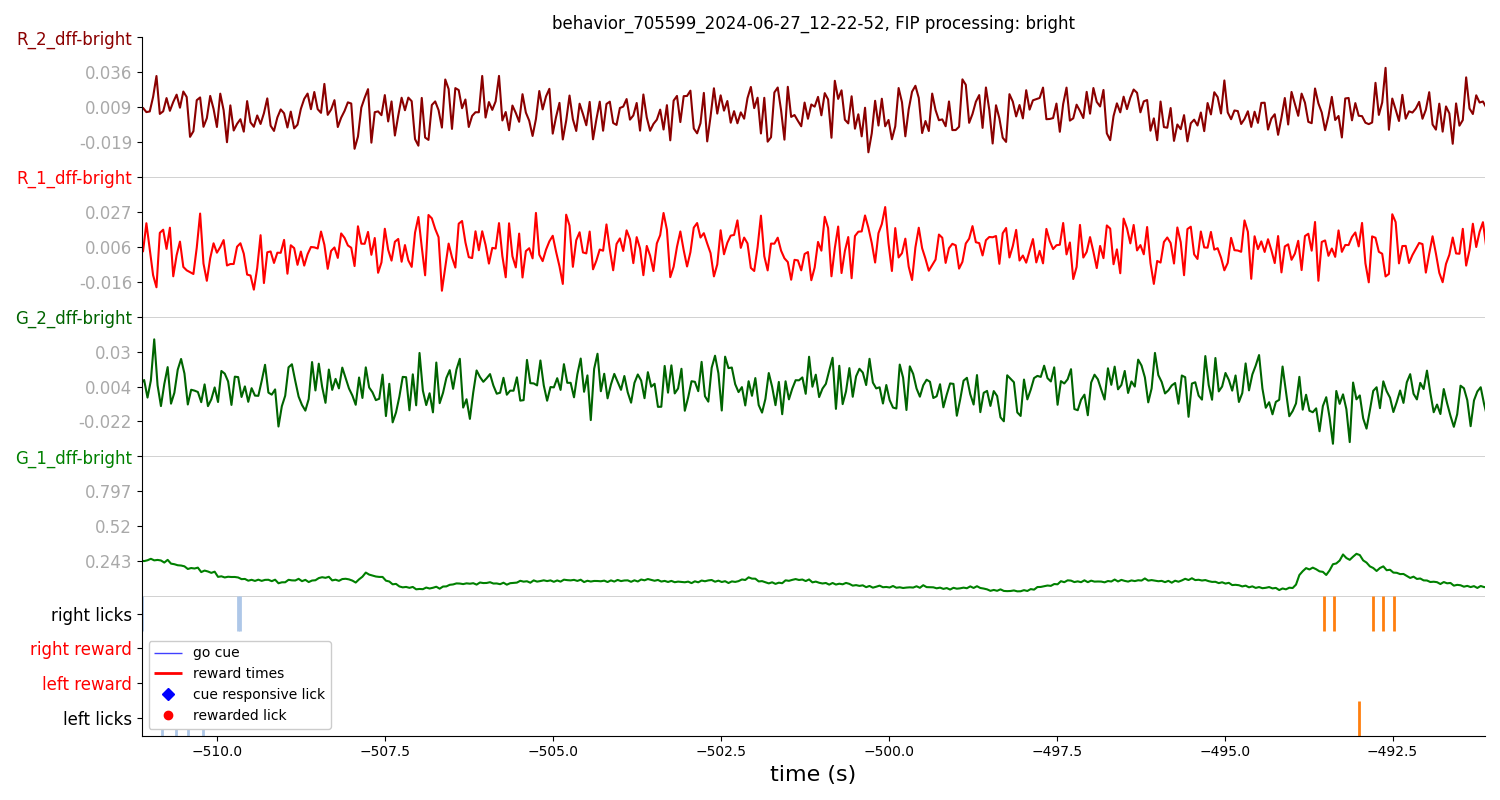

In [8]:
%matplotlib inline
%matplotlib ipympl
from aind_dynamic_foraging_basic_analysis.plot import plot_session_scroller as pss 
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize = (6,3))
pss.plot_session_scroller(nwb, plot_bouts=True) #, ax = ax, fig = fig
# ## TODO, this is broken at the moment because of the fig input
# Press up arrow to zoom out (in time)
# Press down arrow to zoom in (in time)
# Press left arrow to go back in time
# Press right arrow to go forward in time
plt.show()

## PSTH

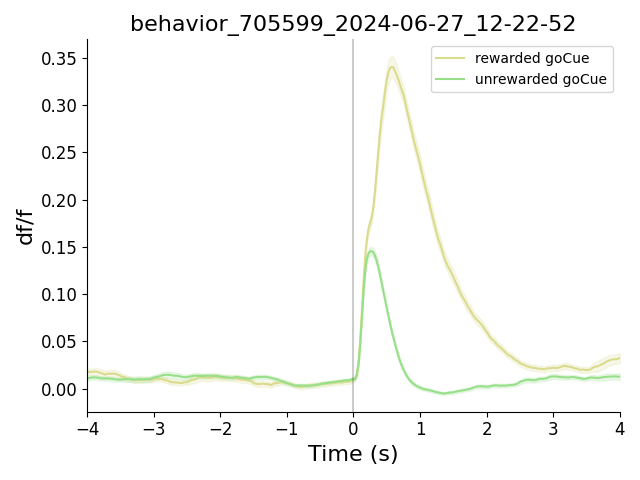

In [9]:
from aind_dynamic_foraging_basic_analysis.plot import plot_fip as pf
rewarded_go_cues = nwb.df_trials.query('reward == 1')['goCue_start_time_absolute'].values
unrewarded_go_cues = nwb.df_trials.query('reward == 0')['goCue_start_time_absolute'].values
pf.plot_fip_psth_compare_alignments(nwb, {'rewarded goCue':rewarded_go_cues, 'unrewarded goCue':unrewarded_go_cues},'G_1_dff-poly', censor=True)
plt.show()